### Covid Statistics Notebook 

  
                                         
                                         
                                    Author: Tomás von Bischoffshausen 
                                                   January, 2022                                                              

***

### 1. Understand Client Requierment

##### 1.1 General Requirement

- Create a graph similar to the one present in the documment "Le rappel vaccinal réduit fortement le risque de décès lié au Covid-19, 17.12.21), before Annexe (pg15).
    - Line plot representing three variable in four quadrants.
    - Data have to represent information from dec, 14, 2021 untill the most recent date.

- Creating this graph uses three data sources that shoud be integrated in order to create it.

##### 1.2 Context URLs provided by the client

The following urls provide relevant information to contextualize:

1.2.1 France Covid Situation BI Dashoard (link to a BI dashboard, not a data source): https://mapthenews.maps.arcgis.com/apps/opsdashboard/index.html#/5df19abcf8714bc590a3b143e14a548c

1.2.2 Client Calculations: http://doc-solid.fr/wordpress/
- ratio contamination/death
- avg death
- avg contamination

1.2.3. Institu pasteur: https://www.pasteur.fr/fr/centre-medical/fiches-maladies/grippe


##### 1.3 Specific Graph wanted

- Line chart 

- From 14th of december untill the most recent date.

- With the evolution of:
    - Vaccine avec rappel (line1)
    - Vaccine avec sans rappel(line 2)
    - Non Vaccines (line 3)

- Crossed by:
    - test positives (quadrant 1)
    - test positive with sympthomes (quadrant 2)
    - conventional hospitalization (quadrant 3)
    - critical hospitalization (quadrant 4)

Reference Image:

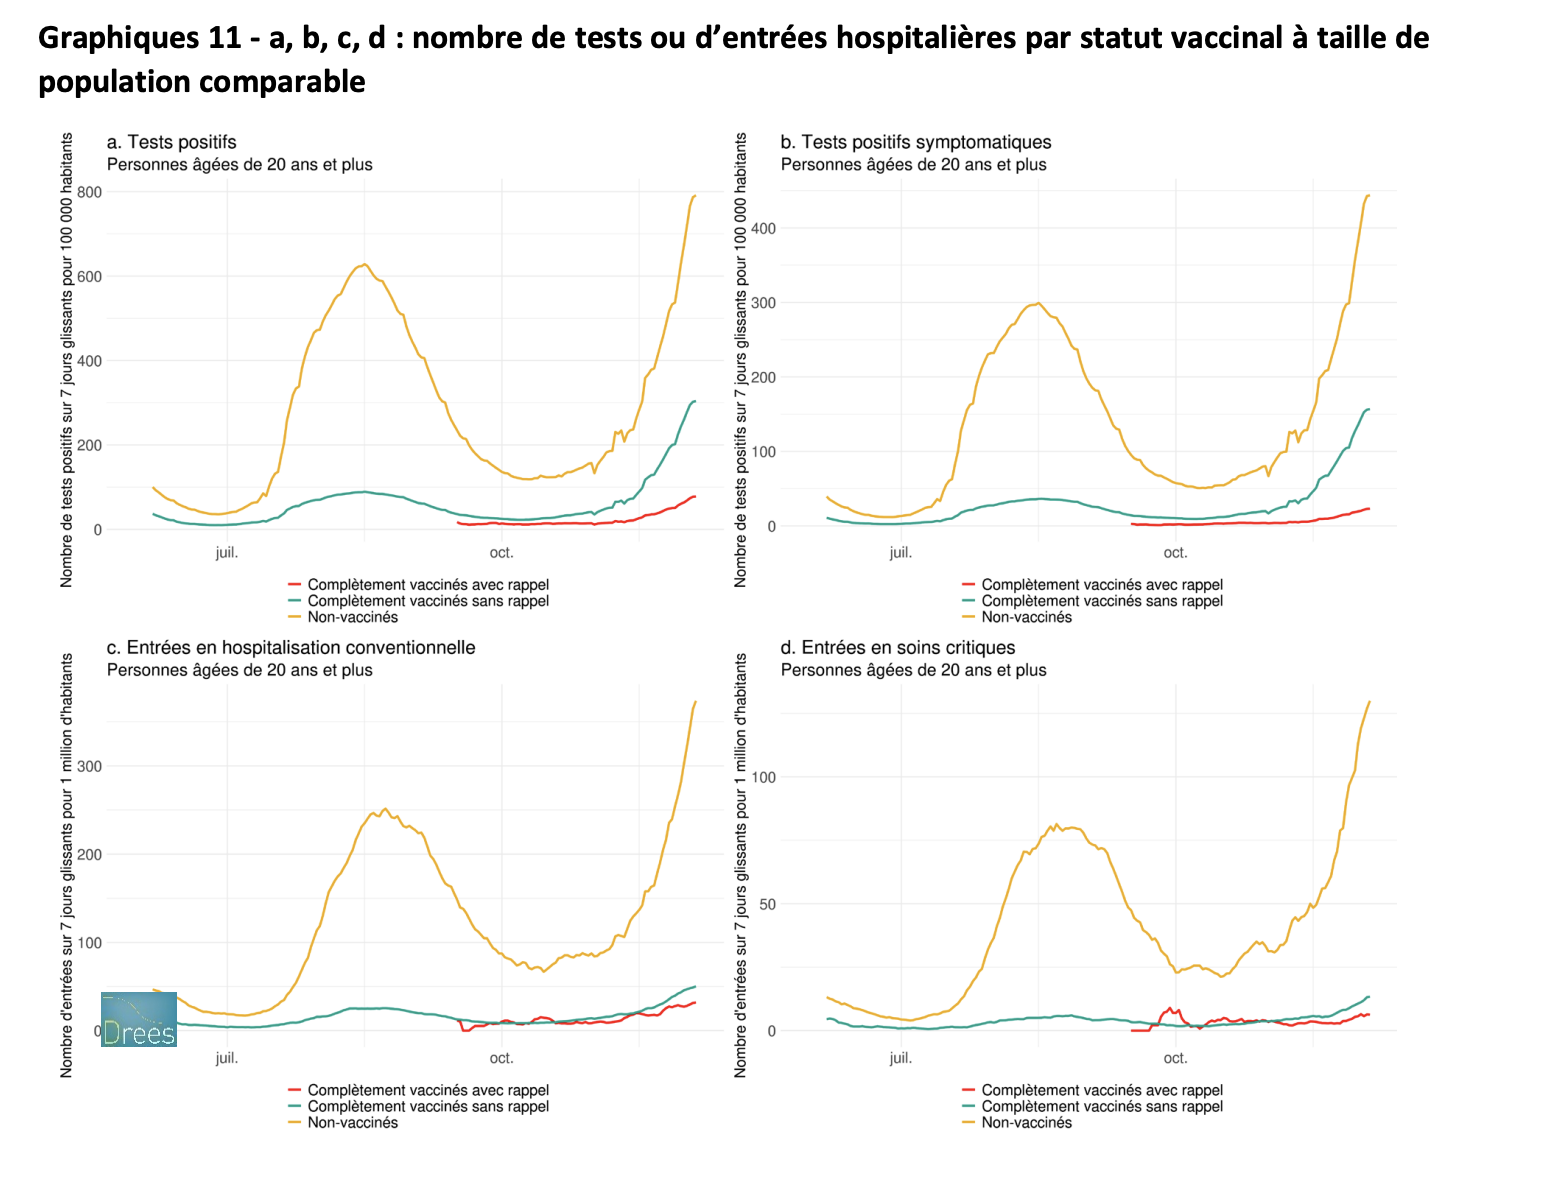

##### 1.4 Data Sources where I can find the variables in order to create the graph

- Data Source 1 (dataset): https://www.data.gouv.fr/fr/datasets/synthese-des-indicateurs-de-suivi-de-lepidemie-covid-19/

- Data Source 2 (dataset): https://www.data.gouv.fr/fr/datasets/indicateurs-de-suivi-de-lepidemie-de-covid-19/

- Data Source 3(datasets repository): https://www.data.gouv.fr/fr/organizations/sante-publique-france/#datasets


***

### 2. Find the variables in the data sources provided by the client

##### 2.1 Data Source 1: Dataset with data related to the COVID-19 epidemic in France: overview.

url: https://www.data.gouv.fr/fr/datasets/donnees-relatives-a-lepidemie-de-covid-19-en-france-vue-densemble/

In [1]:
import pandas as pd

In [2]:
dataset_1 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/5c4e1452-3850-4b59-b11c-3dd51d7fb8b5")
dataset_1.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,dep,date,reg,lib_dep,lib_reg,tx_pos,tx_incid,TO,R,hosp,...,dchosp,reg_rea,incid_hosp,incid_rea,incid_rad,incid_dchosp,reg_incid_rea,pos,pos_7j,cv_dose1
0,01,2020-03-18,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.062612,NaN,2,...,0,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01,2020-03-19,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.132379,NaN,2,...,0,79,1.0,0.0,0.0,0.0,44.0,NaN,NaN,NaN
2,01,2020-03-20,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.155635,NaN,2,...,0,87,0.0,0.0,1.0,0.0,16.0,NaN,NaN,NaN
3,01,2020-03-21,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.173524,NaN,4,...,0,88,3.0,0.0,0.0,0.0,15.0,NaN,NaN,NaN
4,01,2020-03-22,84,Ain,Auvergne et Rhône-Alpes,NaN,NaN,0.212880,NaN,8,...,0,106,3.0,1.0,1.0,0.0,25.0,NaN,NaN,NaN


**Quantity of departments in the dataset**

In [3]:
departments_Q = dataset_1.dep.nunique()
print("The quantity of departments in the dataset is: " + str(departments_Q))

The quantity of departments in the dataset is: 102


**Names of the departments present in the dataset**

In [4]:
departments_N = dataset_1.dep.unique()
print("The names of the departments present in the dataset are: \n\n" + str(departments_N))

The names of the departments present in the dataset are: 

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '2A' '2B' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44' '45' '46' '47' '48' '49' 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89 90 91 92 93 94 95 971 972 973 974 976]


**Quantity of Regions in the dataset**

In [7]:
regions_Quantity = dataset_1["reg"].nunique()
print("The number of regions in the dataset is: "+str(regions_Quantity))

The number of regions in the dataset is: 18


**Names of the regions present in the dataset**

In [9]:
regions_name = dataset_1.reg.unique()
print("\nThis are the regions names that the dataset contains: " + str(regions_name))


This are the regions names that the dataset contains: [84 32 93 44 76 28 75 24 27 53 94 52 11  1  2  3  4  6]


**Data Dates**

In [10]:
print("This dataset contains data from " + dataset_1.date.min() + " to " + dataset_1.date.max())

This dataset contains data from 2020-03-18 to 2022-01-14


**Data Columns**

In [11]:
print("The dataset contains the following columns:")
dataset_1.columns

The dataset contains the following columns:


Index(['dep', 'date', 'reg', 'lib_dep', 'lib_reg', 'tx_pos', 'tx_incid', 'TO',
       'R', 'hosp', 'rea', 'rad', 'dchosp', 'reg_rea', 'incid_hosp',
       'incid_rea', 'incid_rad', 'incid_dchosp', 'reg_incid_rea', 'pos',
       'pos_7j', 'cv_dose1'],
      dtype='object')

**Columns Descriptions**

'date' = Date 
'dep'= Department 
'reg'= Region 
'lib_dep' = department tag 
'lib_reg'= region tag 

Data relating to the hospital situation

- 'hosp'= Number of patients currently hospitalized for COVID-19. 

- 'incid_hosp' = Number of new patients hospitalized in the last 24 hours. 

- 'rea' = Number of patients currently in intensive care or intensive care. 

- 'incid_rea' = Number of new patients admitted to intensive care during the last 24 hours. 

- 'rad' = Cumulative number of patients who have been hospitalized for COVID-19 and returned home due to better health. 

- 'incid_rad'= Returns of new housing in the last 24 hours.

- COVID-19 death data*

- 'dchosp'= hospital death 'incid_dchosp' = New patients who died in the hospital during the last 24 hours. 

- 'esms_dc'= Death in ESMS 

- 'dc_tot'= Accumulation of deaths (accumulation of deaths observed in hospitals and nursing homes) 

Test data

- 'conf'= Number of confirmed cases 

- 'conf_j1' = Number of new confirmed cases (D-1 date of results) 

- 'pos'= Number of people declared positive (D-3 sampling date) 

- 'pos_7j' = Number of people declared positive in a week (D-3 sampling date) 

- 'esms_cas' = Confirmed cases in ESMS Note: The history of confirmed cases in EHPAD and ESMS is not included in this file. They are available in this dataset.

Data relating to indicators for monitoring the COVID-19 epidemic

- 'tx_pos' = Positivity rate of virological tests (The positivity rate corresponds to the number of people who tested positive (RT-PCR and antigen test) for the first time in more than 60 days compared to the total number of people who tested positive or negative in a given period; and who have never tested positive in the previous 60 days). 

- 'tx_incid' = Incidence rate (epidemic activity: The incidence rate corresponds to the number of people who tested positive (RT-PCR and antigen test) for the first time in more than 60 days relative to the size of the population. It is expressed per 100,000 inhabitants)

- 'OT' = Occupancy rate: hospital pressure on resuscitation capacity (Proportion of COVID-19 patients currently in intensive care, intensive care or in a continuous monitoring unit compared to total beds in initial capacity, i.e. before increasing resuscitation capacity beds in a hospital). 

- 'R'= Virus reproduction factor (evolution of R0: The reproduction number of the virus: is the average number of people that an infected person can contaminate. If the effective R is greater than 1, the epidemic develops; is less than 1, the epidemic is decreasing)

###### 2.2  Data Source 2: Dataset with Monitoring indicators of the COVID-19 epidemic
    
url: https://www.data.gouv.fr/fr/datasets/indicateurs-de-suivi-de-lepidemie-de-covid-19/

In [12]:
dataset_2 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/381a9472-ce83-407d-9a64-1b8c23af83df")
dataset_2.head()

,extract_date,tx_incid,R,taux_occupation_sae,tx_pos
0,2020-03-18,NaN,NaN,15.2,NaN
1,2020-03-19,5.570823,NaN,19.8,NaN
2,2020-03-20,8.403950,NaN,25.6,NaN
3,2020-03-21,11.013409,NaN,28.7,NaN
4,2020-03-22,13.600502,NaN,33.1,NaN


**Data Dates**

In [13]:
print("This dataset contains data from " + dataset_2.extract_date.min() + " to " + dataset_2.extract_date.max())

This dataset contains data from 2020-03-18 to 2022-01-15


**Data Columns**

In [14]:
print("The dataset contains the following columns:")
dataset_2.columns

The dataset contains the following columns:


Index(['extract_date', 'tx_incid', 'R', 'taux_occupation_sae', 'tx_pos'], dtype='object')

**Columns Description**

On May 28, 2020, the government presented as part of the second stage of the deconfinement plan, the summary map of the departments that serves as a reference for the differentiated measures applied since June 2. This map is constructed from 4 indicators and is complemented by a risk analysis. The indicators are as follows: 


- "tx_incid": Epidemic activity (incidence rate). The incidence rate corresponds to the number of people who tested positive (RT-PCR and antigen test) for the first time in more than 60 days compared to the size of the population. It is expressed per 100,000 inhabitants and allows to compare geographical areas with each other.Three levels have been established for this indicator: green: fewer than 10 people tested positive out of 100,000 people tested, for a continuous week; orange: more than 10 people tested positive out of 100,000 people tested, for a continuous week; Red: More than 50 people tested positive out of 100,000 people tested, during a mobile week. 


- "R": Positive rate of virological tests. The positivity rate corresponds to the number of people who tested positive (RT-PCR and antigen test) for the first time in more than 60 days compared to the total number of people who tested positive or negative in a given period; and have never tested positive in the previous 60 days. Three levels have been established for this indicator: green: positivity rate between 0 and 5%; orange: positivity rate between 5 and 10%; red: positivity rate above 10%.


- "taux_occupation_sae": Virus reproduction factor (evolution of R0). The reproduction number of the virus: This is the average number of people that an infected person can infect. If the effective R is greater than 1, the epidemic develops; if it is less than 1, the epidemic decreases. This indicator, stopped on Tuesday and updated on Thursday, is an indicator of the epidemiological situation of approximately 7 days before and should be interpreted in the light of data detection and reporting activities. The indicator is updated once a week. Three levels have been established for this indicator: Green: R0 between 0 and 1; Orange: R0 between 1 and 1.5; Red: R0 greater than 1.5.


- "tx_pos": Hospital pressure on resuscitation capacity. This indicator reflects the level of demand for resuscitation but also the level of stress on the hospital's resuscitation capabilities. This is the proportion of COVID-19 patients currently in intensive care, intensive care or in a continuous monitoring unit compared to the total number of beds in initial capacity, i.e. before increasing the capacity of resuscitation beds in a hospital. Three levels have been established for this indicator: Green: occupancy rate between 0 and 30%; Orange: occupancy rate between 30 and 60%; Red: occupancy rate above 60%. Description of the data The data made available present the daily value of these 4 indicators at the national and departmental level since March 15, 2020. Frequency of data refresh: daily.

#####  2.3 Data Source 3: Repository with datasets with France Public  Health data
url: http://localhost:8888/notebooks/Documents/covid%20work/Untitled.ipynb?kernel_name=python3#Dataset-3:-Salud-p%C3%BAblica-Francia

This repository contains different datasets with covid data.

##### 2.4 Conclusion from the search of variables in the datasets provided by the client

An analysis made over the data sources given by the client in order to generate the graph required shows that not all the required variables are present in those datasets. There is data for test status and type of hospitalization from 2020-03-18 to 2022-01-11, but there is no data about the vaccinated status.

Vaccinated Status:
    - not present in the any data source.

Test status:
    - present in dataset 1 in this columns:
        - 'conf'= Number of confirmed cases
        - 'conf_j1' = Number of new confirmed cases (D-1 date of results)
        - 'pos'= Number of people declared positive (D-3 sampling date)
        - 'pos_7j' = Number of people declared positive in a week (D-3 sampling date)
        - 'esms_cas' = Confirmed cases in ESMS

Type of hospitalization:
    - present in dataset 1 in this columns:
        - 'hosp'= Number of patients currently hospitalized for COVID-19.
        - 'incid_hosp' = Number of new patients hospitalized in the last 24 hours.
        - 'rea' = Number of patients currently in intensive care or intensive care.
        - 'incid_rea' = Number of new patients admitted to intensive care during the last 24 hours.
        - 'rad' = Cumulative number of patients who have been hospitalized for COVID-19 and returned home due to better health.
        - 'incid_rad'= Returns of new housing in the last 24 hours.


##### 2.5 Suggestion

Given there is no variables about vaccination status, and taking in account that the authors of the document provided by the clent estimates that variable, I suggest that the next step would be to read the document carefully and understand how and whith which data the authors estimated the vaccinated status variable in order to create the last graph of the document.

***

### 3. Data Sources Analysis of the Study: "Vaccine booster greatly reduces risk of death from Covid-19, Pairings between the SI-VIC, SI-DEP and VAC-SI databases until December 5, 2021" 

##### 3.1 Findings

"The results presented here come from the use of the matches between the data of:
- SI-VIC, database on conventional hospitalizations or in critical care (resuscitation,
intensive and continuing care) of patients hospitalized for or positive for the Covid-19 test.
- SI-DEP, database on the results of screening tests for the SARS-CoV-2 virus,
- VAC-SI, database on Covid-19 vaccinations.

url = https://data.drees.solidarites-sante.gouv.fr/explore/dataset/covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si/information/?disjunctive.vac_statut

The counts resulting from the pairing of the three databases SI-VIC, SI-DEP, VAC-SI relate to persons whose age is indicated. 

In addition, hospital events (entry into hospital conventional, entry into critical care, death) are recorded on the date of occurrence. 

With the exception of the columns "Hospital admissions and deaths - All" of Table 1, all hospital event statistics presented are based on people for whom at least least one positive RT-PCR test was identified between 21 days before hospitalization and 21 days after the hospital event (or the date of data extraction for the most recent statistics).

This restriction of scope to patients admitted to hospital or deceased for whom a positive test has been
identified explains the difference observed between the “Total” and “including RT-PCR positive” columns of the section “Hospital admissions and deaths”.

The counts resulting from the pairing of the three databases SI-VIC, SI-DEP, VAC-SI relate to persons whose age is indicated. In addition, hospital events (entry into hospital conventional, entry into critical care, death) are recorded on the date of occurrence. 

The deaths of Covid-19 positive patients are those occurring in hospital (including in other services than those of conventional hospitalization and critical care , and that the Covid-19 either the reason for hospitalization or not ), recorded in SI-VIC and concerning only admitted patients in the hospital after May 15 - in order to focus the analysis on the events started from the fourth epidemic wave. In practice, the numbers of deaths over the period under review (which starts in July) of people admitted to hospital before May 15 are very low. 

In addition, the counts presented here (“death / total” column of Table 1) are on the date of occurrence
and resulting from pairings; they therefore do not coincide with unmatched and dated data registration published by Public Health France.

In line with the choices made by Public Health France with regard to major categories 4, the vaccination status of the patients was defined according to four modalities, the contours of which vary according to the vaccine used and the patients' history of Covid-19: for vaccinations without a history of Covid-19 with non-single-dose vaccines (excluding Janssen):
- Not vaccinated (0): person who has never received an injection of vaccine against SARS-CoV-2 - Recent first dose (1-): person having received a first dose for 14 days or less
- First effective dose (1+): person having received a first dose for more than 14 days or
having received a second dose for 7 days or less
- Complete vaccination (C): person having received a second dose 5 for more than 7 days
for vaccinations without a history of Covid-19 with a single dose vaccine (Janssen):
- Not vaccinated (0): person who has never received an injection of vaccine against SARS-CoV-2 - Recent first dose (1-): person who has received a dose of Janssen for 14 days or less
- Complete vaccination (C): person who has received a dose of Janssen for more than 14 days
for vaccinations with a history of Covid-19:
- Not vaccinated (0): person with a history who has never received an injection of vaccine against SARS-CoV-2
- Recent first dose (1-): person with a history having received a dose for 7 days or less
- Complete vaccination (C): person with a history having received a dose for more than 7 days

In all cases, the category "complete vaccination (C)" is separated into two subgroups, them- the same being each separated into three sub-groups:
- people who have not performed a booster injection:
o people who have obtained full vaccination status for less than 3 months;
o people who have obtained full vaccination status for more than 3 months and less than
6 months ;
o people who have obtained full vaccination status for more than 6 months;
- people who have given a booster injection:
o people who have obtained full vaccination status for less than 3 months;
o people who have obtained full vaccination status for more than 3 months and less than
6 months ;
o people who have obtained full vaccination status for more than 6 months.

The identification of the vaccination status is made from the information on the injections in the VAC- database. IF. A methodological note 6, associated with the publication of the Drees of last October 29, details the treatments applied, and in particular how patient observations are taken into account
cannot be found in the VAC-SI databases.

The recall being, until now, generally authorized only from 6 months after obtaining a complete diagram, the categories of people who have obtained a complete diagram for less than 6 years months as well as a reminder were not retained in the presentations of this study because of their low share in the population and their very specific character.

The vaccination coverage rates used here were estimated by the DREES by mobilizing, for numerators, the VAC-SI source. To approach the place of residence when it is not known in the databases, it is the place of vaccination that is taken into account 7 . The populations residing in the 1st January 2021 estimated by INSEE ( https://www.insee.fr/fr/statistiques/1893198) have been used as the denominator of immunization coverage rates. The numbers of unvaccinated people are established by the difference between the resident population and the number of people vaccinated.The counts of tests, entries, deaths and population according to vaccination status concern populations residing in France.

***

### 4. Dataset used by the Study "Vaccine booster greatly reduces risk of death from Covid-19, Pairings between the SI-VIC, SI-DEP and VAC-SI databases until December 5, 2021" 

In [15]:
import pandas as pd
df_national = pd.read_csv("covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si.csv",sep=";")
df_national.head()

,date,vac_statut,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif
0,2021-05-31,Primo dose récente,18296.40,1616.91,712.49,321.43,15.52,12.98,4.40,3.40,0.50,0.00,4932600
1,2021-05-31,Primo dose efficace,43243.37,2958.75,548.88,177.21,47.21,26.83,6.17,3.00,11.00,8.00,10476104
2,2021-06-01,Primo dose récente,14913.78,1449.23,509.52,244.88,21.70,13.35,4.48,2.48,0.00,0.00,4921363
3,2021-06-02,Non-vaccinés,133397.11,16103.13,5811.63,2137.15,270.47,202.94,56.70,48.87,34.28,19.57,40749021
4,2021-06-03,Primo dose efficace,39443.04,2392.85,325.10,95.54,16.43,12.25,6.79,4.58,7.04,4.18,11259888


###### 4.1 Types of variables in the dataset

In [16]:
df_national.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1759 non-null   object 
 1   vac_statut     1759 non-null   object 
 2   nb_PCR         1759 non-null   float64
 3   nb_PCR_sympt   1759 non-null   float64
 4   nb_PCR+        1759 non-null   float64
 5   nb_PCR+_sympt  1759 non-null   float64
 6   HC             1759 non-null   float64
 7   HC_PCR+        1759 non-null   float64
 8   SC             1759 non-null   float64
 9   SC_PCR+        1759 non-null   float64
 10  DC             1759 non-null   float64
 11  DC_PCR+        1759 non-null   float64
 12  effectif       1759 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 178.8+ KB


###### 4.2 Attributes of vac_statut

In [17]:
print("Atributes of the vac_statut variable: ")
df_national.vac_statut.unique()

Atributes of the vac_statut variable: 


array(['Primo dose récente', 'Primo dose efficace', 'Non-vaccinés',
       'Complet de moins de 3 mois - avec rappel',
       'Complet entre 3 mois et 6 mois - sans rappel',
       'Complet de moins de 3 mois - sans rappel',
       'Complet entre 3 mois et 6 mois - avec rappel',
       'Complet de 6 mois et plus - sans rappel',
       'Complet de 6 mois et plus - avec rappel'], dtype=object)

###### 4.3 Columns descriptions

date: Day of sampling (tests), admission (hospitalizations) or death.

vac_statut: Vaccination status on the day of the test, admission or death (to take into account incubation times. **

nb_pcr: Number of PCR tests performed.

nb_pcr_sympt: Number of PCR tests performed where the patient is declared symptomatic.

nb_pcr +: Number of positive PCR tests performed.

nb_pcr + _sympt: Number of positive PCR tests performed where the patient declares himself symptomatic.

hc: Number of admissions of totally hospitalized patients.

hc_pcr +: Number of fully hospitalized patient entries for which a positive PCR test was identified. **

sc: Number of critical care entries.

sc_pcr +: number of critical patient entries for which a positive PCR test was identified. **

dc: Number of deaths of hospitalized patients.

dc_pcr +: Number of deaths of hospitalized patients in which a positive PCR test was identified.

effectif: Resident population according to vaccination status.

###### 4.4 Dataset data dates (accesed on january, 13, 2022)

In [18]:
date_min = df_national.date.min()  
date_max = df_national.date.max()  
print("This dataset contains data from " + str(date_min) + " to " + str(date_max) )

This dataset contains data from 2021-05-31 to 2021-12-26


***

### 5. Specific variables and attributes we will use to create the graph

**5.1 Vaccination Status** 
- vac_statut: Vaccination status on the day of the test, admission or death (to take into account incubation times. 

**5.2 Test Status** 
- nb_pcr: Number of PCR tests performed.

- nb_pcr0: Number of positive PCR tests performed.** 
    
    - Positive: nb_pcr0 

    - Negative: nb_pcr - nb_pcr0 

**4.3 Hospitalization Status** 
- hc: Number of admissions of fully hospitalized patients. 

- hc_pcr+: Number of fully hospitalized patient entries for whom a positive PCR test was identified. 

- sc: Number of critical care entries. 

- sc_pcr+: number of critical patient entries for whom a positive PCR test was identified.

### 6. Check Point

The variables in order to create the same graph of the studio "Vaccine booster greatly reduces risk of death from Covid-19, Pairings between the SI-VIC, SI-DEP and VAC-SI databases until December 5, 2021" are present in the dataset https://data.drees.solidarites-sante.gouv.fr/explore/dataset/covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si/information/?disjunctive.vac_statut. This dataset contains data from 2021-05-31 to 2021-12-26. If the client is ok with those variables and dates of data, I can start making thre graph with four quadrants.  

### 7. Tables from data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') 

###### 7.1 API to connect to the most recent data

In [ ]:
import pandas as pd
import requests
url = "https://api.covid19api.com/summary"
r = requests.get(url)
json = r.json()
json.keys()

**7.1 Table: Original Dataset**

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
df_national = pd.read_csv("covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si.csv",sep=";")
df_national.head()

,date,vac_statut,nb_PCR,nb_PCR_sympt,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+,effectif
0,2021-05-31,Primo dose récente,18296.40,1616.91,712.49,321.43,15.52,12.98,4.40,3.40,0.50,0.00,4932600
1,2021-05-31,Primo dose efficace,43243.37,2958.75,548.88,177.21,47.21,26.83,6.17,3.00,11.00,8.00,10476104
2,2021-06-01,Primo dose récente,14913.78,1449.23,509.52,244.88,21.70,13.35,4.48,2.48,0.00,0.00,4921363
3,2021-06-02,Non-vaccinés,133397.11,16103.13,5811.63,2137.15,270.47,202.94,56.70,48.87,34.28,19.57,40749021
4,2021-06-03,Primo dose efficace,39443.04,2392.85,325.10,95.54,16.43,12.25,6.79,4.58,7.04,4.18,11259888


**7.2 Table: Dataset filtered by the variables I will use to create the graphs** 

In [7]:
df1 = df_national[["date","vac_statut","nb_PCR","nb_PCR+","nb_PCR+_sympt","HC", "HC_PCR+","SC","SC_PCR+","DC","DC_PCR+"]]
df1.set_index("date", inplace=True)
df1.head()

,vac_statut,nb_PCR,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+
date,,,,,,,,,,
2021-05-31,Primo dose récente,18296.40,712.49,321.43,15.52,12.98,4.40,3.40,0.50,0.00
2021-05-31,Primo dose efficace,43243.37,548.88,177.21,47.21,26.83,6.17,3.00,11.00,8.00
2021-06-01,Primo dose récente,14913.78,509.52,244.88,21.70,13.35,4.48,2.48,0.00,0.00
2021-06-02,Non-vaccinés,133397.11,5811.63,2137.15,270.47,202.94,56.70,48.87,34.28,19.57
2021-06-03,Primo dose efficace,39443.04,325.10,95.54,16.43,12.25,6.79,4.58,7.04,4.18


###### Table:  Variables sum crossed by vaccination status

In [8]:
df1.groupby(["vac_statut"]).sum()

,nb_PCR,nb_PCR+,nb_PCR+_sympt,HC,HC_PCR+,SC,SC_PCR+,DC,DC_PCR+
vac_statut,,,,,,,,,
Complet de 6 mois et plus - avec rappel,1554008.00,53832.11,16745.93,2254.19,1731.94,376.21,272.29,408.80,309.63
Complet de 6 mois et plus - sans rappel,1929118.25,167692.20,77039.16,7762.76,6250.91,1554.24,1319.20,1678.22,1384.39
Complet de moins de 3 mois - avec rappel,27058.13,1670.55,675.48,74.33,44.46,23.78,16.91,5.31,5.31
Complet de moins de 3 mois - sans rappel,7887502.89,287755.69,121754.94,7640.13,5563.24,1810.40,1410.66,694.79,566.12
Complet entre 3 mois et 6 mois - avec rappel,254094.27,15692.24,5205.21,306.83,216.12,88.85,66.66,40.28,31.82
Complet entre 3 mois et 6 mois - sans rappel,8759559.35,731663.76,356708.98,13738.07,10577.01,3134.55,2461.42,1924.19,1525.59
Non-vaccinés,14670274.47,1224889.02,542959.36,45954.24,33669.15,13801.41,10811.69,6086.17,4385.89
Primo dose efficace,4005783.34,96517.18,38376.89,3060.79,2276.74,747.49,535.37,698.22,503.08
Primo dose récente,1759605.28,87086.52,41903.98,1770.77,1344.63,487.03,352.09,54.35,38.63


###### Table: cumulative quantity per variable

In [9]:
df1.sum()

vac_statut       Primo dose récentePrimo dose efficacePrimo dos...
nb_PCR                                                  4.0847e+07
nb_PCR+                                                 2.6668e+06
nb_PCR+_sympt                                          1.20137e+06
HC                                                         82562.1
HC_PCR+                                                    61674.2
SC                                                           22024
SC_PCR+                                                    17246.3
DC                                                         11590.3
DC_PCR+                                                    8750.46
dtype: object

###### Table: Correlations between variables

In [70]:
# df1["vac_statut"].unique()

In [68]:
# from sklearn.preprocessing import OrdinalEncoder
# enc = OrdinalEncoder()
# X = [['Male', 1], ['Female', 3], ['Female', 2]]
# enc.fit(X)
# OrdinalEncoder()
# enc.categories_
# enc.transform([['Female', 3], ['Male', 1]])


In [69]:
# sns.heatmap(df1.corr(), annot=True)

There is a weak correlation between vaccination status and all the variables in the dataset.

# 8. Graphs

In [77]:
# Connect to the API of the data source

import requests
response = requests.get("https://data.drees.solidarites-sante.gouv.fr/explore/dataset/covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si/api/?disjunctive.vac_statut")
print(response)


<Response [200]>


In [118]:
# All the national dataset
df_national2 = pd.read_csv("covid-19-resultats-issus-des-appariements-entre-si-vic-si-dep-et-vac-si.csv",sep=";", index_col="date")

In [123]:
# Dataset since 2021-11-01
df_national2_tail = df_national2.tail(157)

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###### Graph: Quantity of PCR tests in time, by vaccination status 

Text(0.5, 1.0, 'Quantity of PCR tests in time, by vaccination status')

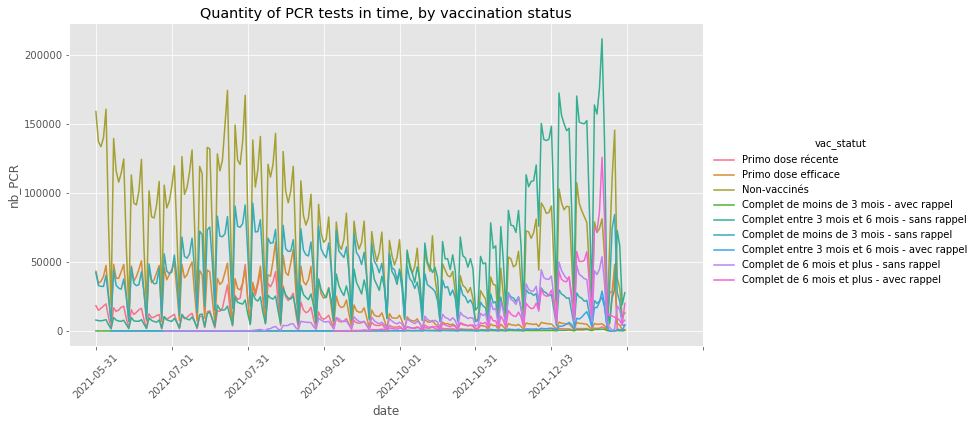

In [125]:
sns.relplot(data=df_national2, x="date", y="nb_PCR", hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks([0,30,60,90,120,150,180,210,240], rotation=45)
plt.title("Quantity of PCR tests in time, by vaccination status")

###### Graph: Quantity of PCR tests in time, by vaccination status (Last 60 days)

Text(0.5, 1.0, 'Quantity of PCR tests in time, by vaccination status (last months)')

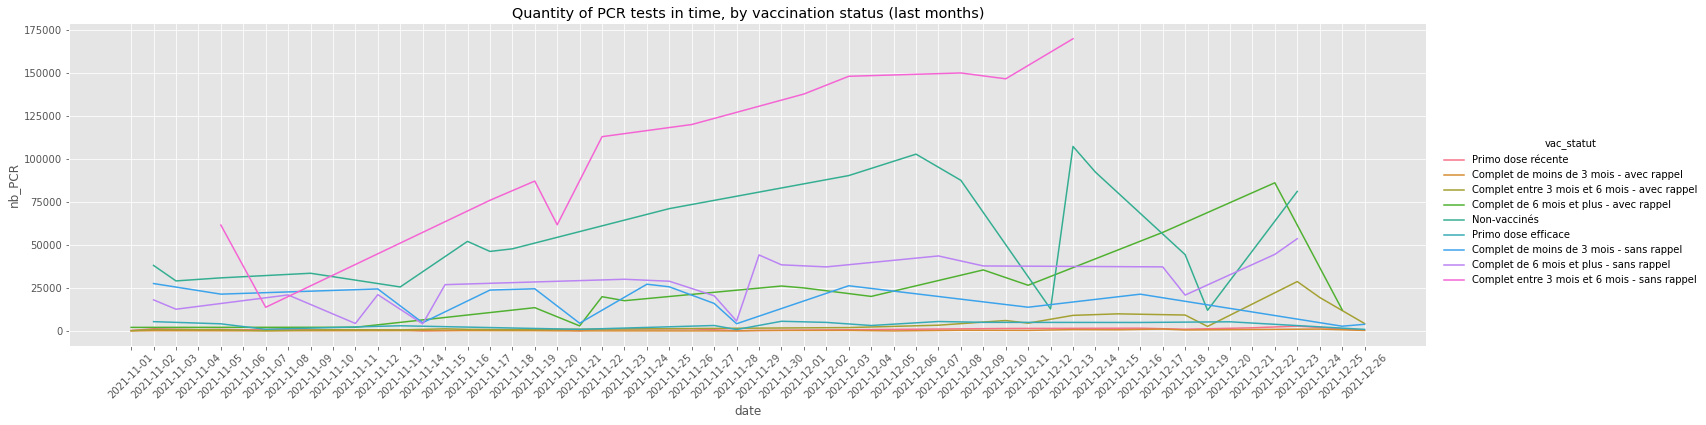

In [129]:
ax = sns.relplot(data=df_national2_tail, x="date", y="nb_PCR", hue="vac_statut",kind="line",height=5, aspect=4)
plt.xticks(rotation=45)
plt.title("Quantity of PCR tests in time, by vaccination status (last months)")

##### Graph: Quantity of PCR tests symptomatic in time, by vaccination status

Text(0.5, 1.0, 'Quantity of PCR tests symptomatic in time, by vaccination status')

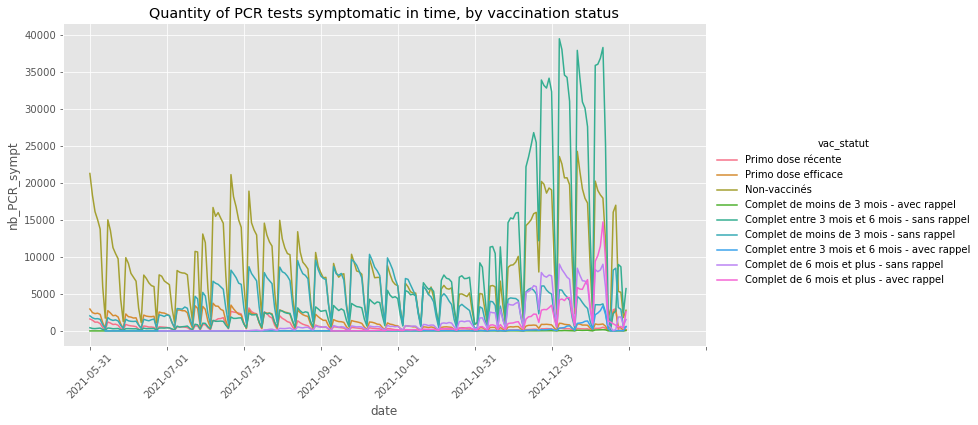

In [150]:
sns.relplot(data=df_national2, x="date", y="nb_PCR_sympt", hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks([0,30,60,90,120,150,180,210,240], rotation=45)
plt.title("Quantity of PCR tests symptomatic in time, by vaccination status")

##### Graph: Quantity of PCR tests symptomatic in time, by vaccination status (last 60 days)

Text(0.5, 1.0, 'Quantity of PCR tests symptomatic in time, by vaccination status (last months)')

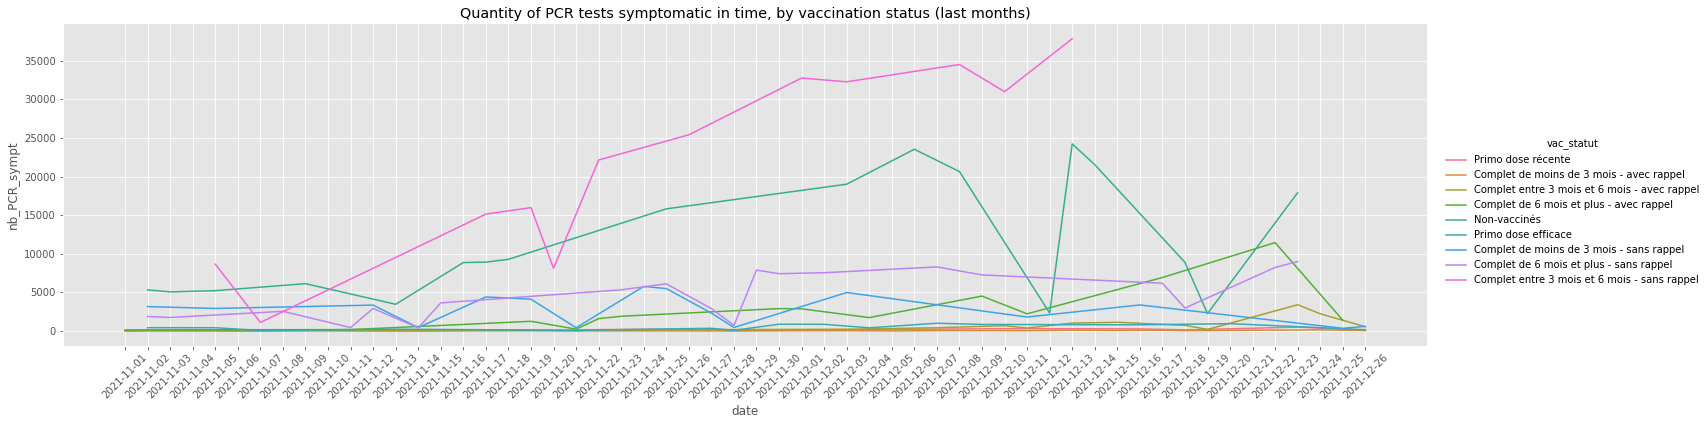

In [153]:
sns.relplot(data=df_national2_tail, x="date", y="nb_PCR_sympt", hue="vac_statut",kind="line",height=5, aspect=4)
plt.xticks(rotation=45)
plt.title("Quantity of PCR tests symptomatic in time, by vaccination status (last months)")

###### Graph: Quantity of positive PCR tests in time,  by vaccination status

Text(0.5, 1.0, 'Quantity of positive PCR tests in time, by vaccination status¶')

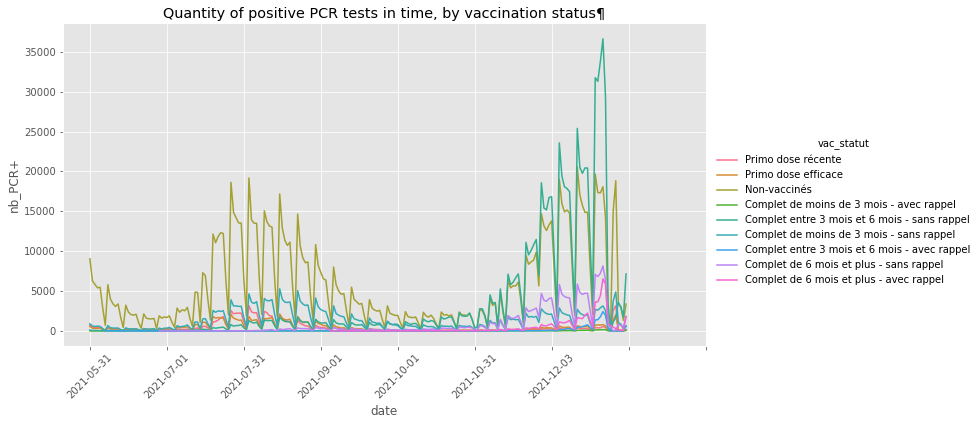

In [133]:
sns.relplot(data=df_national2, x="date", y="nb_PCR+", hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks([0,30,60,90,120,150,180,210,240], rotation=45)
plt.title("Quantity of positive PCR tests in time, by vaccination status¶")

###### Quantity of positive PCR tests in time,  by vaccination status (last 60 days)

Text(0.5, 1.0, 'Quantity of positive PCR tests in time, by vaccination status (last 60 days)')

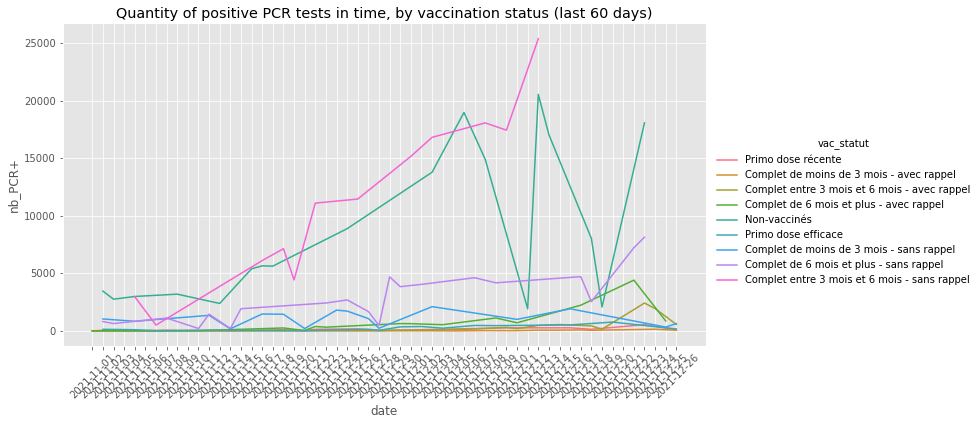

In [134]:
sns.relplot(data=df_national2_tail, x="date", y="nb_PCR+", hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks(rotation=45)
plt.title("Quantity of positive PCR tests in time, by vaccination status (last 60 days)")

###### Graph: Quantity of positive pcr tests with sympthoms in time, by vaccination status

Text(0.5, 1.0, 'Quantity of positive pcr tests with sympthoms in time, by vaccination status')

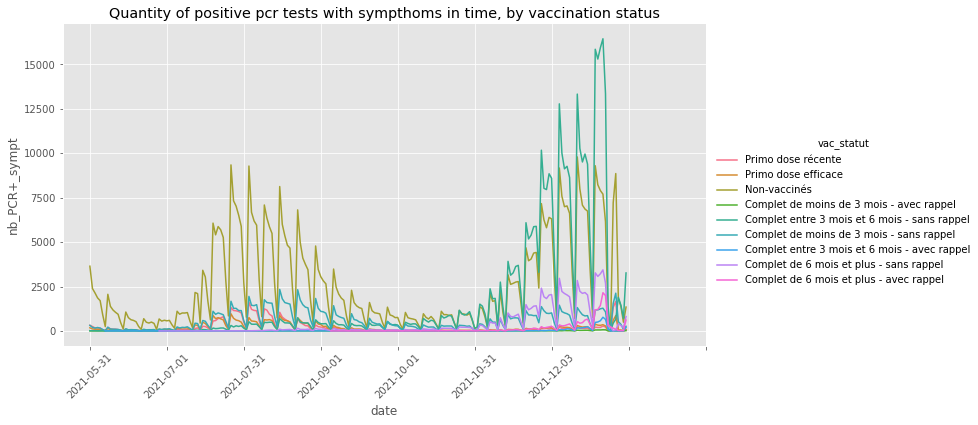

In [135]:
sns.relplot(data=df_national2, x="date", y="nb_PCR+_sympt", hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks([0,30,60,90,120,150,180,210,240], rotation=45)
plt.title("Quantity of positive pcr tests with sympthoms in time, by vaccination status")

###### Graph: Quantity of positive pcr tests with sympthoms in time, by vaccination status (last 60 days)

Text(0.5, 1.0, 'Quantity of positive pcr tests with sympthoms in time, by vaccination status (last 60 days)')

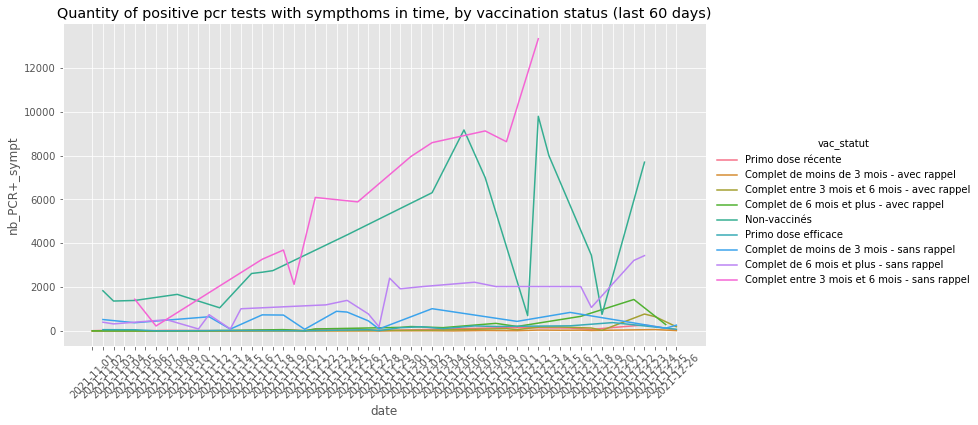

In [136]:
sns.relplot(data=df_national2_tail, x="date", y="nb_PCR+_sympt", hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks(rotation=45)
plt.title("Quantity of positive pcr tests with sympthoms in time, by vaccination status (last 60 days)")

###### Graph: Quantity of admissions of totally hospitalized patients in time, by vaccination status

Text(0.5, 1.0, 'Quantity of admissions of totally hospitalized patients in time, by vaccination status')

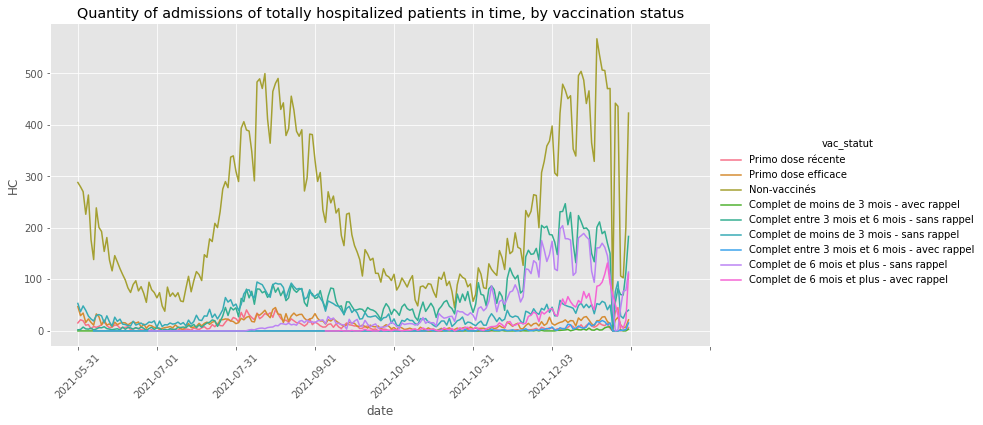

In [137]:
sns.relplot(data=df_national2, x="date", y="HC", hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks([0,30,60,90,120,150,180,210,240], rotation=45)
plt.title("Quantity of admissions of totally hospitalized patients in time, by vaccination status")

###### Graph: Quantity of admissions of totally hospitalized patients in time, by vaccination status (last 60 days)

Text(0.5, 1.0, 'Quantity of admissions of totally hospitalized patients in time, by vaccination status(last 60 days)')

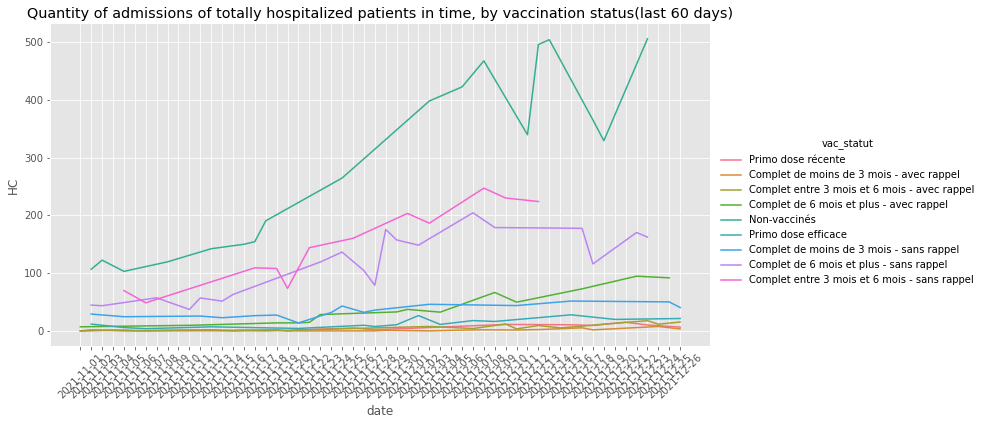

In [138]:
sns.relplot(data=df_national2_tail, x="date", y="HC", hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks(rotation=45)
plt.title("Quantity of admissions of totally hospitalized patients in time, by vaccination status(last 60 days)")

###### Graph: Quantity of  of admissions of totally hospitalized patients with positive PCR in time, by vaccination status

Text(0.5, 1.0, 'Quantity of of admissions of totally hospitalized patients with positive PCR in time, by vaccination status¶')

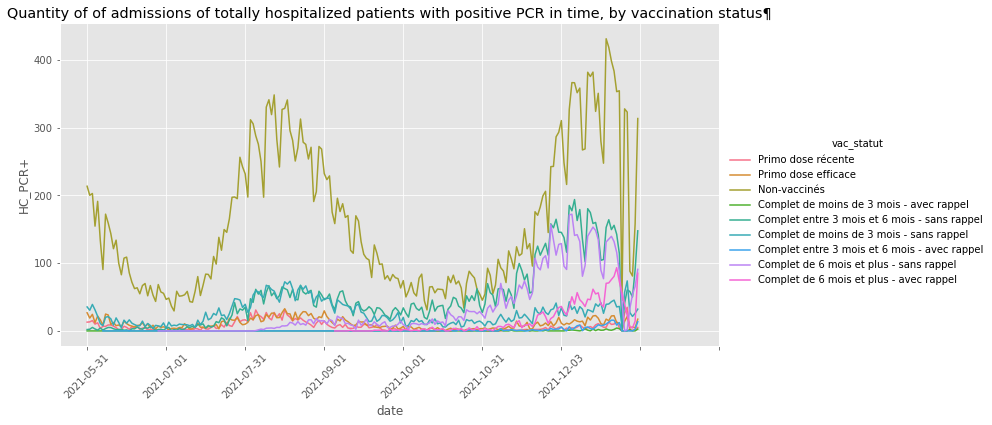

In [139]:
sns.relplot(data=df_national2, x="date", y="HC_PCR+", hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks([0,30,60,90,120,150,180,210,240], rotation=45)
plt.title("Quantity of of admissions of totally hospitalized patients with positive PCR in time, by vaccination status¶")

###### Graph: Quantity of admissions of totally hospitalized patients with positive PCR in time, by vaccination status (last 60 days)

Text(0.5, 1.0, 'Quantity of admissions of totally hospitalized patients with positive PCR in time, by vaccination status (last 60 days)')

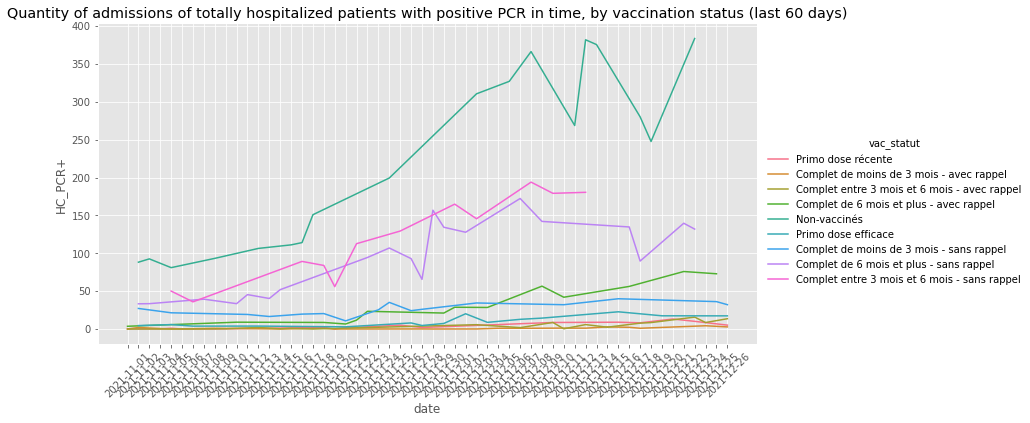

In [140]:
sns.relplot(data=df_national2_tail, x="date", y="HC_PCR+", hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks(rotation=45)
plt.title("Quantity of admissions of totally hospitalized patients with positive PCR in time, by vaccination status (last 60 days)")

###### Graph: Quantity of critical entries in time, by vaccination status

Text(0.5, 1.0, 'Quantity of critical entries in time, by vaccination status')

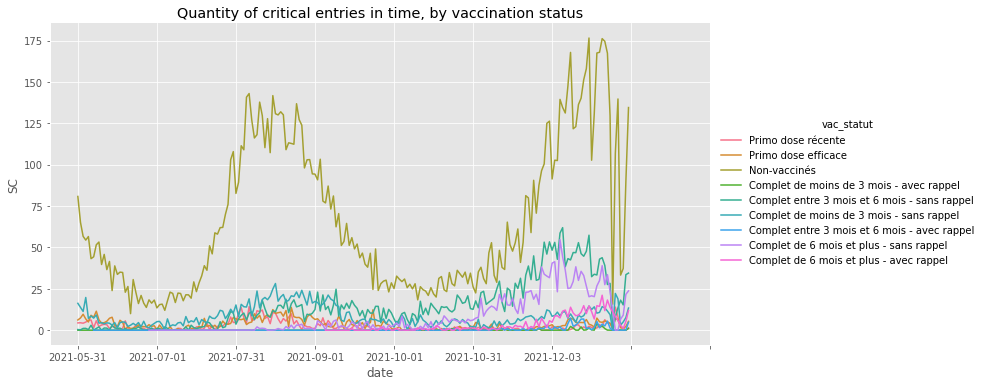

In [141]:
sns.relplot(data=df_national2, x="date", y='SC', hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks([0,30,60,90,120,150,180,210,240])
plt.title("Quantity of critical entries in time, by vaccination status")

###### Graph: Quantity of  critical entries  in time, by vaccination status (las 60 days)

Text(0.5, 1.0, 'Quantity of critical entries in time, by vaccination status (las 60 days)')

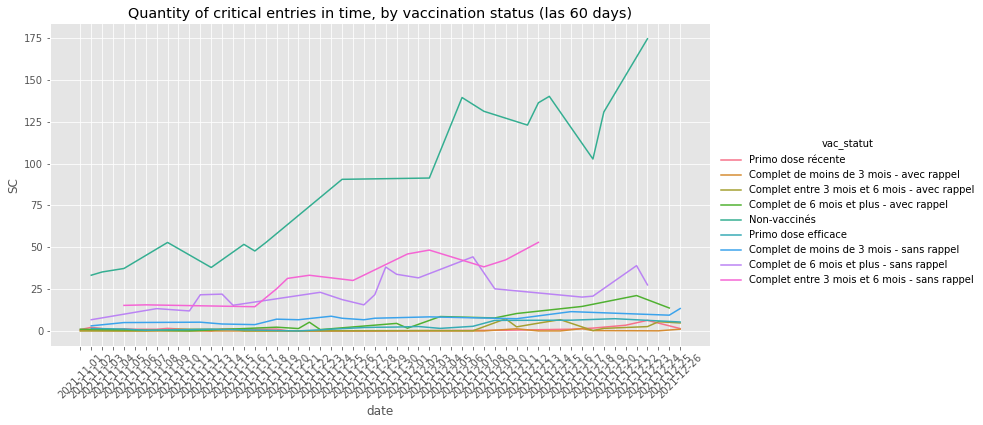

In [142]:
sns.relplot(data=df_national2_tail, x="date", y='SC', hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks(rotation=45)
plt.title("Quantity of critical entries in time, by vaccination status (las 60 days)")

###### Graph: Quantity of  critical entries with positive PCR in time, by vaccination status


Text(0.5, 1.0, 'Quantity of critical entries with positive PCR in time, by vaccination status')

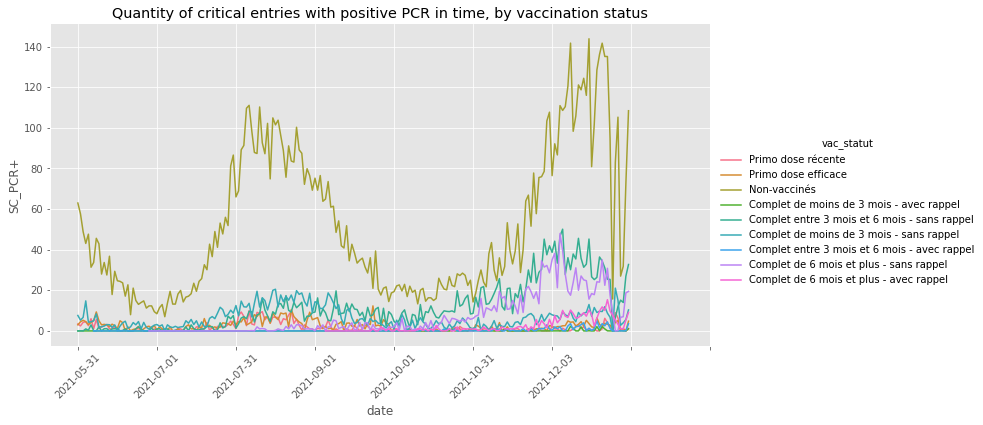

In [143]:
sns.relplot(data=df_national2, x="date", y='SC_PCR+', hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks([0,30,60,90,120,150,180,210,240], rotation=45)
plt.title("Quantity of critical entries with positive PCR in time, by vaccination status")

###### Graph: Quantity of  critical entries with positive PCR in time, by vaccination status (las 60 days)

Text(0.5, 1.0, 'Quantity of critical entries with positive PCR in time, by vaccination status (las 60 days)')

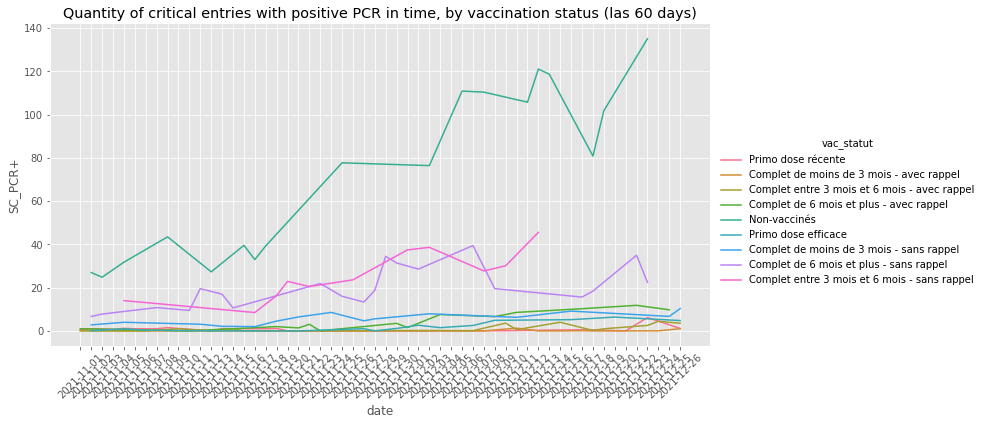

In [144]:
sns.relplot(data=df_national2_tail, x="date", y='SC_PCR+', hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks(rotation=45)
plt.title("Quantity of critical entries with positive PCR in time, by vaccination status (las 60 days)")

 ###### Graph: Quantity of death cases in time , by vaccination status

Text(0.5, 1.0, 'Quantity of death cases in time, by vaccination status')

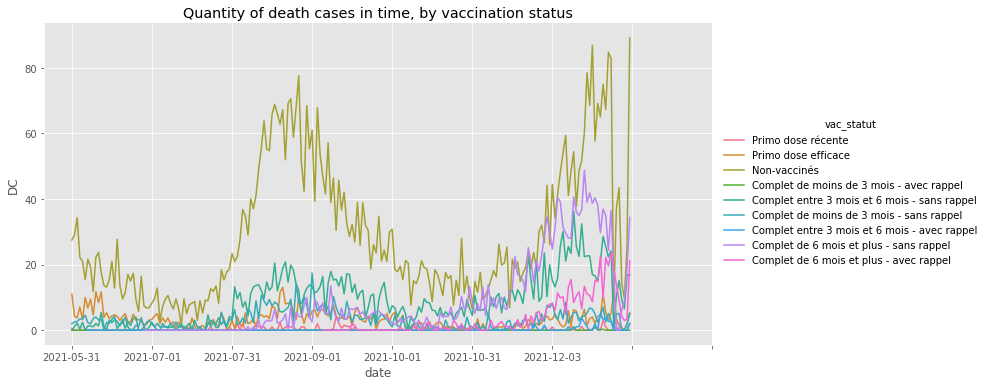

In [145]:
sns.relplot(data=df_national2, x="date", y='DC', hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks([0,30,60,90,120,150,180,210,240])
plt.title("Quantity of death cases in time, by vaccination status")

######  Graph: Quantity of death cases  in time,  by vaccination status (last 60 days)

Text(0.5, 1.0, 'Quantity of death cases in time, by vaccination status (last 60 days)')

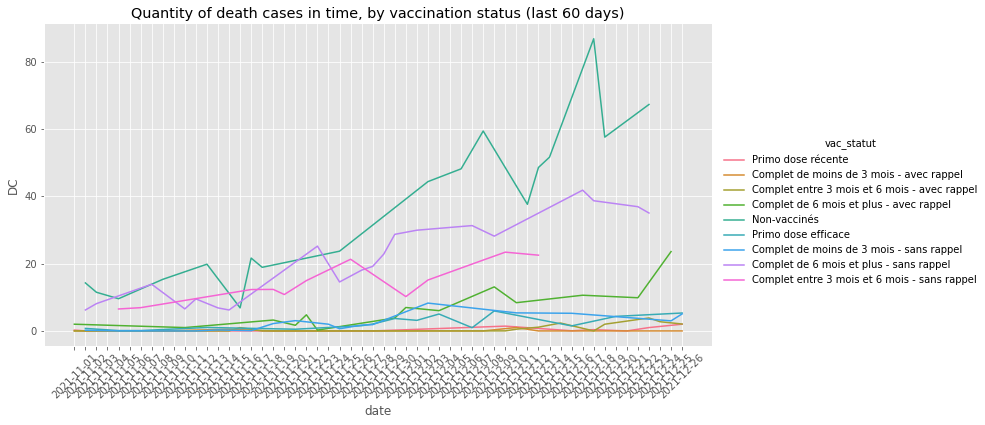

In [146]:
sns.relplot(data=df_national2_tail, x="date", y='DC', hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks(rotation=45)
plt.title("Quantity of death cases in time, by vaccination status (last 60 days)")

###### Graph: Quantity of death cases with positive PCR in time, by vaccination status

Text(0.5, 1.0, 'Quantity of death cases with positive PCR in time, by vaccination status')

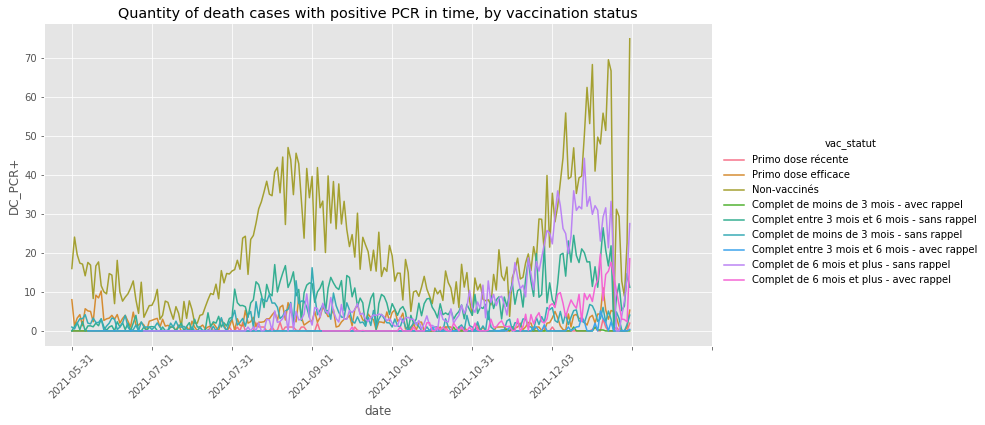

In [147]:
sns.relplot(data=df_national2, x="date", y='DC_PCR+', hue="vac_statut",kind="line",height=5, aspect=2)
plt.xticks([0,30,60,90,120,150,180,210,240], rotation=45)
plt.title("Quantity of death cases with positive PCR in time, by vaccination status")

###### Graph: Quantity of death cases with positive PCR in time, by vaccination status (last 60 days)

Text(0.5, 1.0, 'Quantity of death cases with positive PCR in time, by vaccination status (last 60 days)')

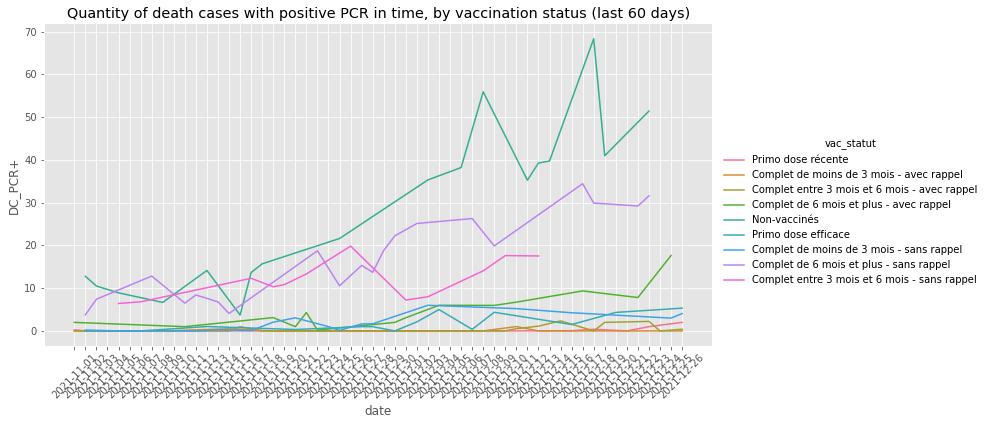

In [148]:
sns.relplot(data=df_national2_tail, x="date", y='DC_PCR+', hue="vac_statut",kind="line",height=5, aspect=2) 
plt.xticks(rotation=45)
plt.title("Quantity of death cases with positive PCR in time, by vaccination status (last 60 days)")

***